In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('Churn_Modelling.csv' ,header = 0)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.size

140000

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().values.any()

False

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [12]:
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["NumOfProducts"].unique())
print(df["HasCrCard"].unique())
print(df["IsActiveMember"].unique())
print(df["Exited"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [15]:
df.iloc[0:4]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [16]:
df.loc[:, "CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

#  Data Visualization

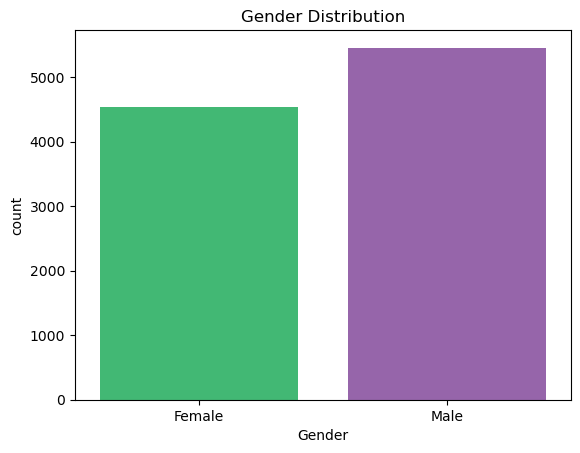

In [17]:
sns.countplot(x='Gender', data=df, palette=['#2ECC71', '#9B59B6'])  
plt.title('Gender Distribution')
plt.show()

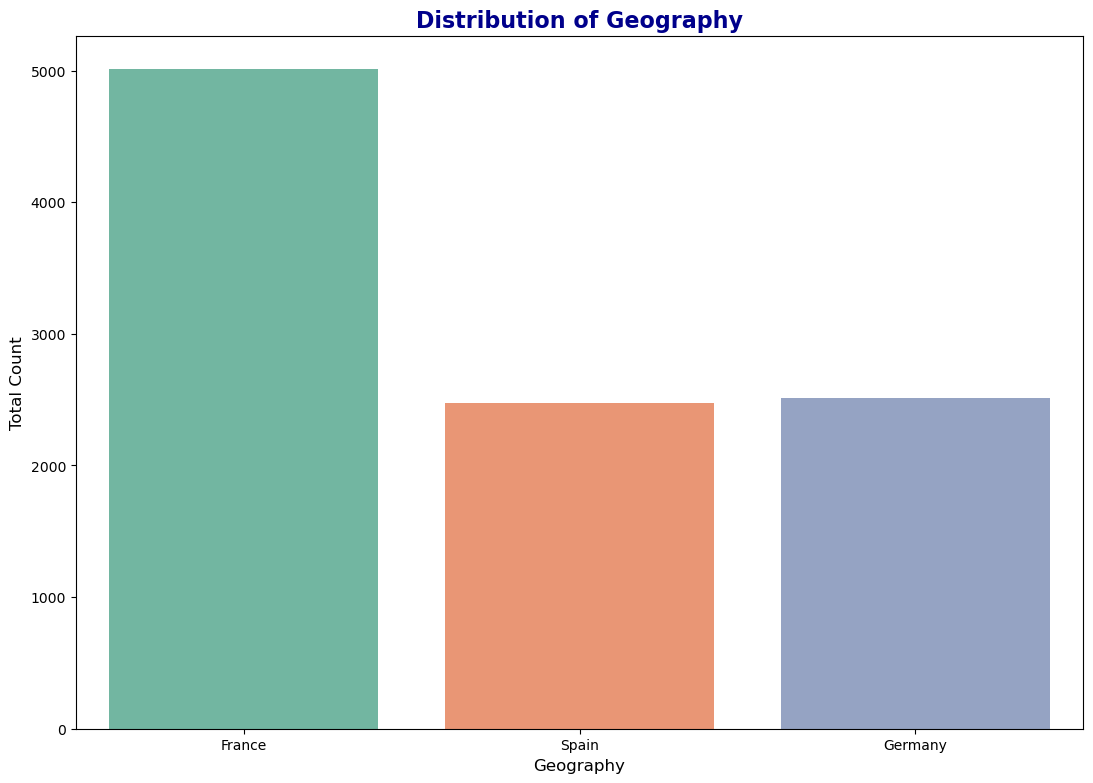

In [18]:
plt.figure(figsize=(13,9)) 

sns.countplot(x='Geography', data=df, palette='Set2') 
plt.xlabel('Geography', fontsize=12, fontweight="medium")
plt.ylabel('Total Count', fontsize=12, fontweight="medium")
plt.title('Distribution of Geography', fontsize=16, fontweight="semibold", color="darkblue")

plt.show()

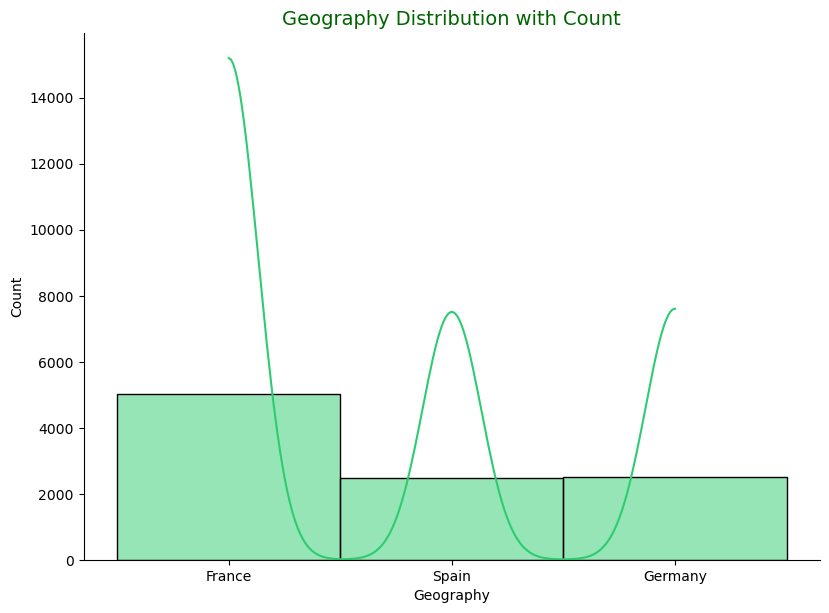

In [19]:
sns.displot(df.Geography, kde=True, color="#2ECC71", height=6, aspect=1.4)
plt.title('Geography Distribution with Count', fontsize=14, fontweight="medium", color="darkgreen")

plt.show()

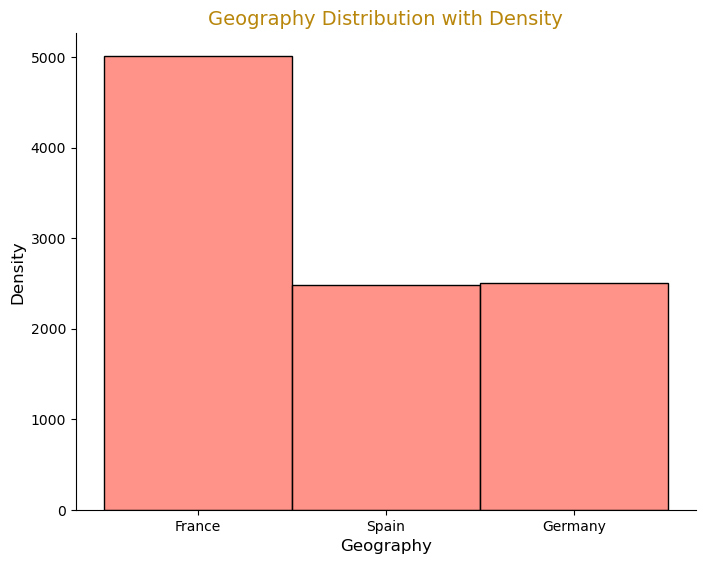

In [20]:
sns.displot(df.Geography, color='#FF6F61', height=5.5, aspect=1.3)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Geography Distribution with Density', fontsize=14, fontweight="regular", color="darkgoldenrod")

plt.show()

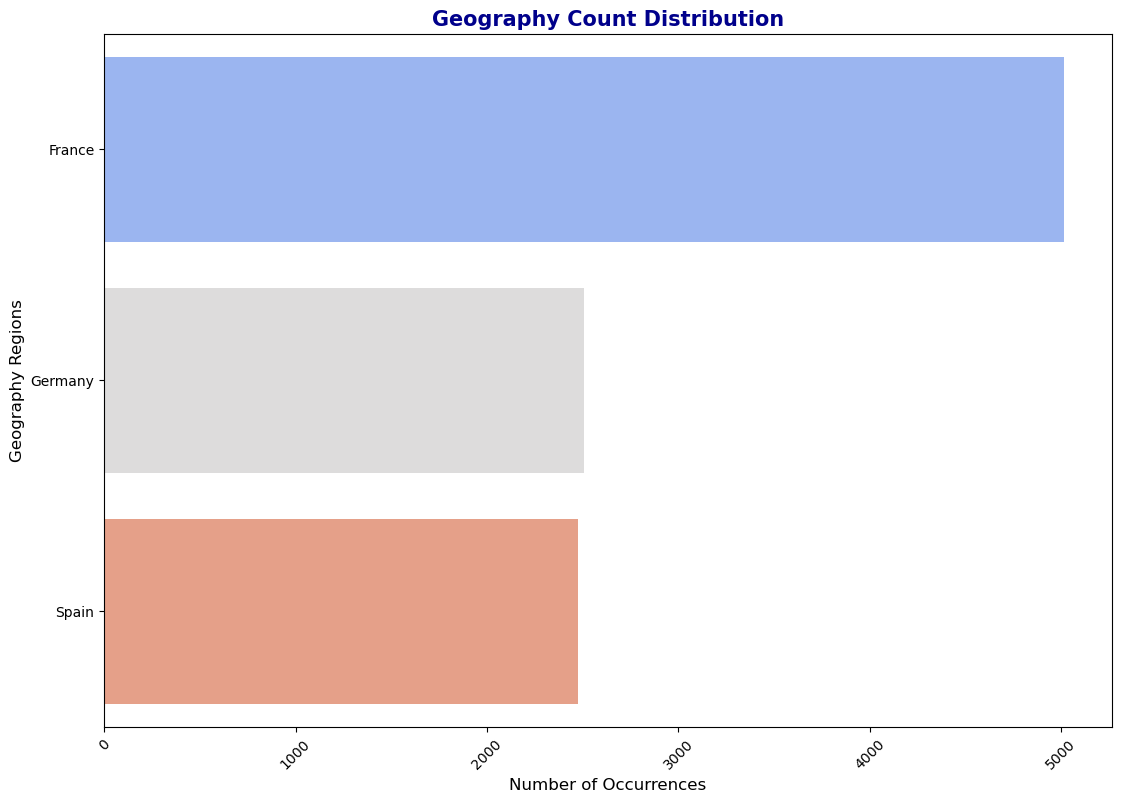

In [21]:
plt.figure(figsize=(13,9))
geo_count = df['Geography'].value_counts()
sns.barplot(x=geo_count.values, y=geo_count.index, orient='h', palette='coolwarm')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Geography Regions', fontsize=12)
plt.title('Geography Count Distribution', fontsize=15, fontweight='bold', color='darkblue')
plt.xticks(rotation=45)

plt.show()

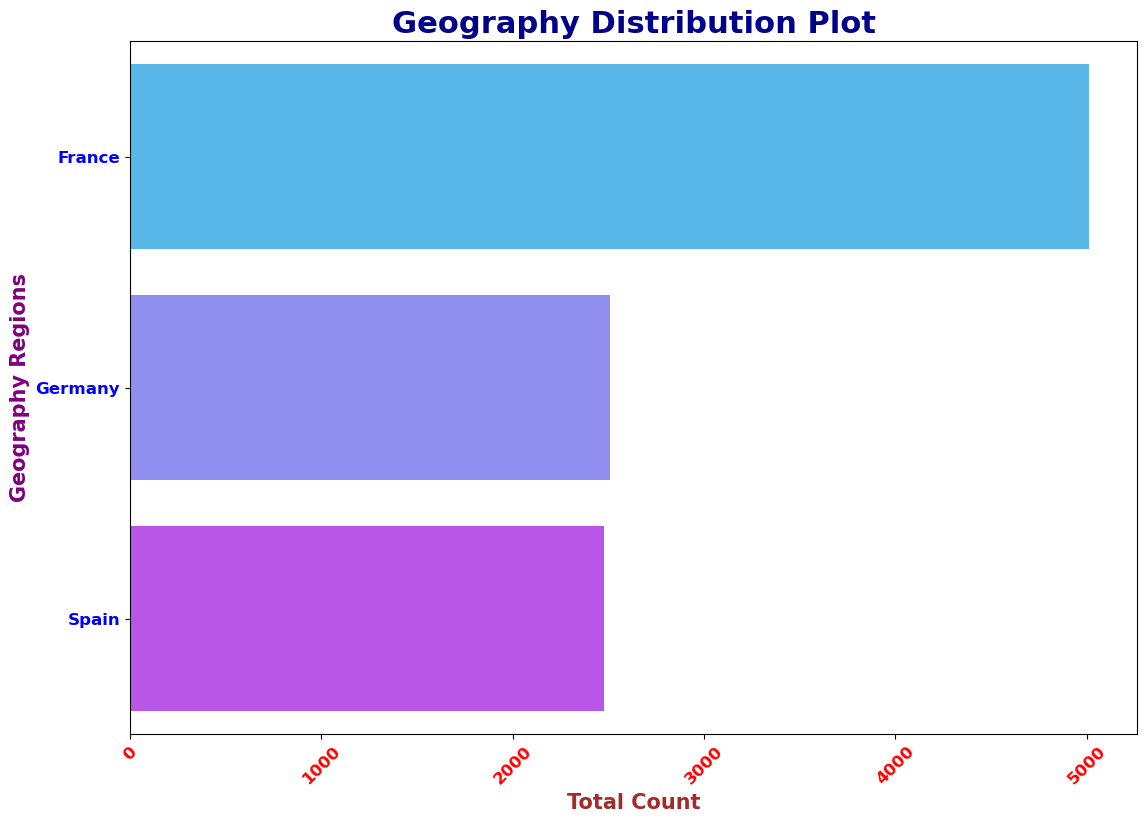

In [22]:
plt.figure(figsize=(13,9))
geo_count = df['Geography'].value_counts()
sns.barplot(x=geo_count.values, y=geo_count.index, orient='h', palette='cool')
plt.xlabel('Total Count', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Geography Regions', fontsize=15, fontweight='bold', color='purple')
plt.title('Geography Distribution Plot', fontsize=22, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='red')  
plt.yticks(fontsize=12, fontweight='bold', color='blue')  
plt.show()

C:\Users\ashut\AppData\Local\Temp\ipykernel_14664\1399018354.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


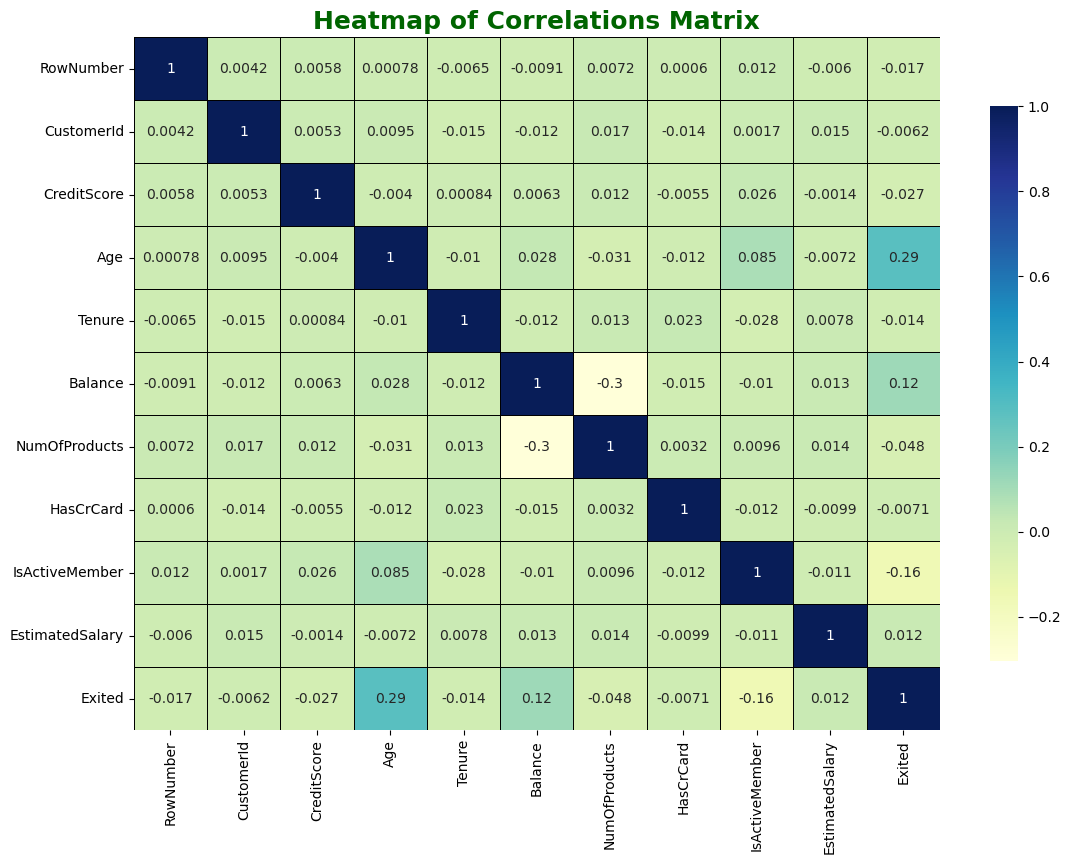

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(13,9))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title("Heatmap of Correlations Matrix", fontsize=18, fontweight='bold', color='darkgreen')
plt.show()

# Preprocess the data

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.drop(labels = ["RowNumber","CustomerId", "Surname"], axis = 1, inplace=True)

In [26]:
df = pd.get_dummies(df, drop_first = True)

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [28]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# Train Logistic Regression Model

In [31]:
lr_model = LogisticRegression()

In [32]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
lr_predictions = lr_model.predict(X_test)

In [34]:
print("Logistic Regression Model Evaluation:\n")
print(f"Accuracy Score: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_predictions):.4f}")
print(f"R² Score: {r2_score(y_test, lr_predictions):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))
print("\nDetailed Classification Report:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Model Evaluation:

Accuracy Score: 0.8110
Precision: 0.5524
Recall: 0.2010
F1-Score: 0.2948
R² Score: -0.1971

Confusion Matrix:
[[1543   64]
 [ 314   79]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [35]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)

In [36]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [37]:
rf_predictions = rf_model.predict(X_test)

In [38]:
print("Evaluation of Random Forest Model:\n")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"Precision Score: {precision_score(y_test, rf_predictions):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_predictions):.4f}")
print(f"Recall Score: {recall_score(y_test, rf_predictions):.4f}")
print(f"R² Score: {r2_score(y_test, rf_predictions):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("\nClassification Report Summary:")
print(classification_report(y_test, rf_predictions))

Evaluation of Random Forest Model:

Accuracy: 0.8655
Precision Score: 0.7541
F1 Score: 0.5777
Recall Score: 0.4682
R² Score: 0.1481

Confusion Matrix:
[[1547   60]
 [ 209  184]]

Classification Report Summary:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



#  Train Gradient Boosting Model

In [39]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.02, max_depth = 1, random_state=42)

In [40]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=42)

In [41]:
gb_predictions = gb_model.predict(X_test)

In [42]:
print("Evaluation of Gradient Boosting Model:\n")
print(f"Accuracy: {accuracy_score(y_test, gb_predictions):.4f}")
print(f"Precision Score: {precision_score(y_test, gb_predictions):.4f}")
print(f"F1 Score: {f1_score(y_test, gb_predictions):.4f}")
print(f"Recall Score: {recall_score(y_test, gb_predictions):.4f}")
print(f"R² Score: {r2_score(y_test, gb_predictions):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))
print("\nDetailed Classification Report:")
print(classification_report(y_test, gb_predictions))

Evaluation of Gradient Boosting Model:

Accuracy: 0.8595
Precision Score: 0.7478
F1 Score: 0.5460
Recall Score: 0.4300
R² Score: 0.1101

Confusion Matrix:
[[1550   57]
 [ 224  169]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.75      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

